In [ ]:
!pip install colorama
!pip install imblearn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from colorama import Fore, Back, Style
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
warnings.filterwarnings("ignore")
%matplotlib inline
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from imblearn.metrics import geometric_mean_score
from sklearn import svm
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.datasets import load_iris

In [ ]:
iris = pd.read_csv('IRIS.csv')
print(iris)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
def outliers(value):
    outlier_perc = {}
    for column in value.columns:
        if value[column].dtype != object:
            q1 = np.quantile(value[column], 0.25)
            q3 = np.quantile(value[column], 0.75)
            iqr = q3 - q1
            upper_bound = q3 + (1.5 * iqr)
            lower_bound = q1 - (1.5 * iqr)
            outliers = value[(value[column] > upper_bound) | (value[column] < lower_bound)][column]
            outlier_percentage = len(outliers) / len(value[column]) * 100
            outlier_perc[column] = outlier_percentage
            outlier_dataframe = pd.DataFrame(data = outlier_perc.values() ,index=outlier_perc.keys() ,columns=['Outlier_percentage'])

    return outlier_dataframe.sort_values(by = 'Outlier_percentage', ascending = False)

outliers(iris)

,Outlier_percentage
sepal_width,2.666667
sepal_length,0.000000
petal_length,0.000000
petal_width,0.000000


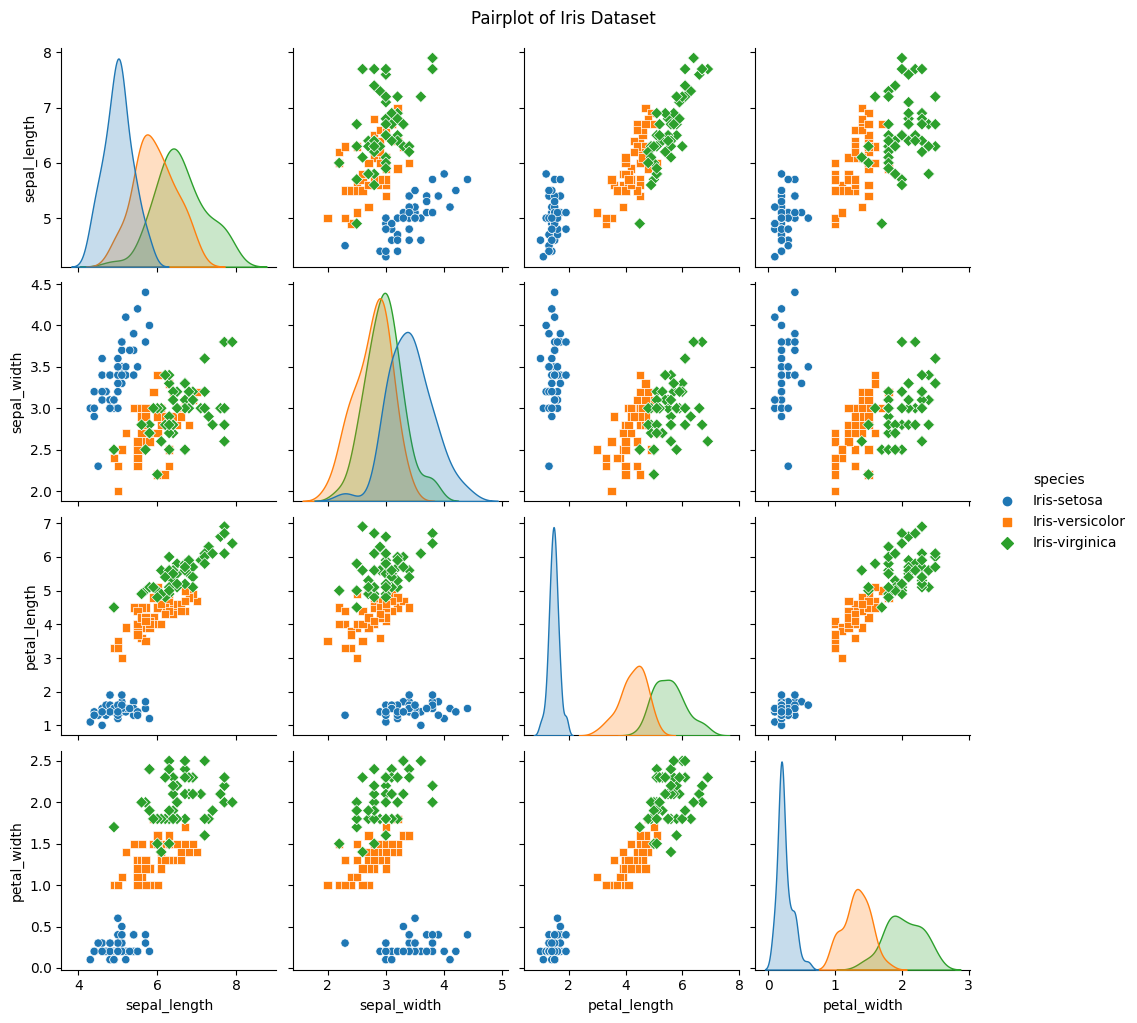

In [ ]:
sns.pairplot(iris, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

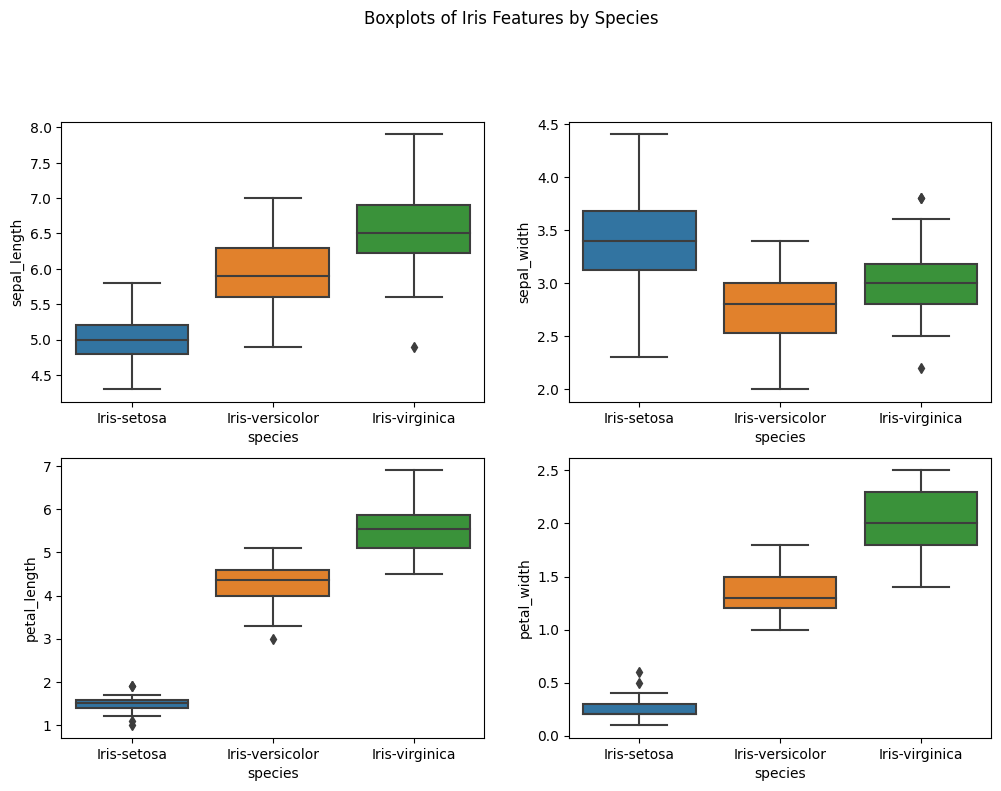

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=iris)
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=iris)
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=iris)
plt.suptitle("Boxplots of Iris Features by Species", y=1.02)
plt.show()

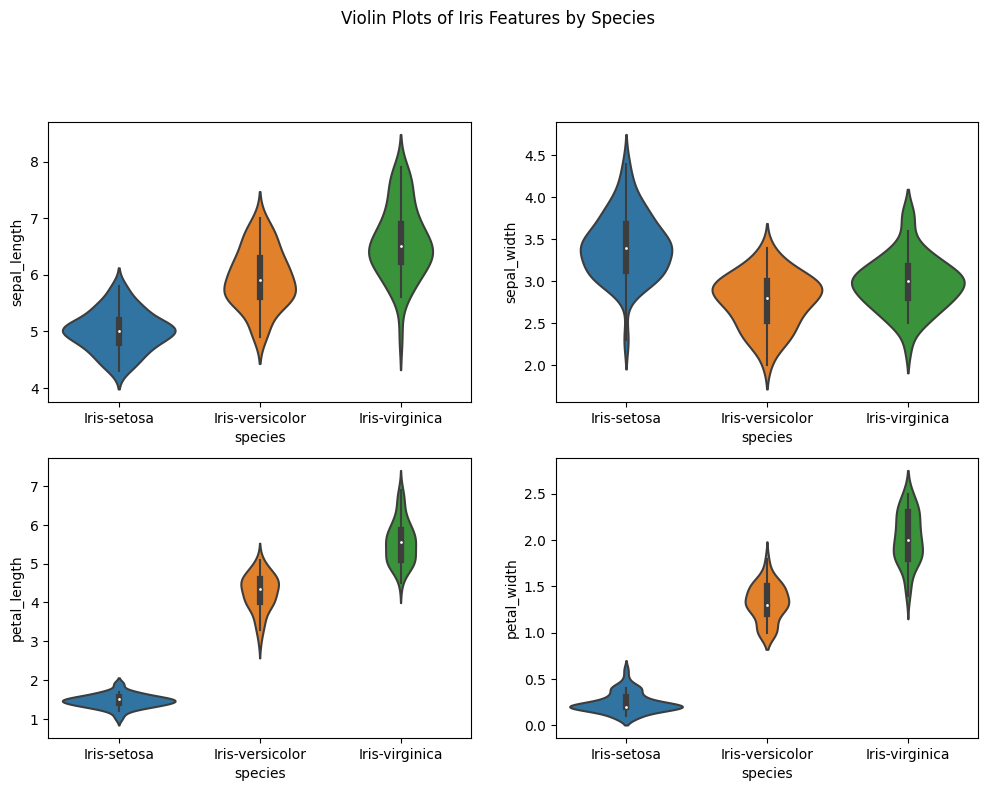

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.violinplot(x='species', y='sepal_length', data=iris)
plt.subplot(2, 2, 2)
sns.violinplot(x='species', y='sepal_width', data=iris)
plt.subplot(2, 2, 3)
sns.violinplot(x='species', y='petal_length', data=iris)
plt.subplot(2, 2, 4)
sns.violinplot(x='species', y='petal_width', data=iris)
plt.suptitle("Violin Plots of Iris Features by Species", y=1.02)
plt.show()

In [ ]:
X= iris.iloc[:, :-1]
y = iris["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the training set
print("Training Set:")
print(X_train.head())

# Display the first few rows of the testing set
print("\nTesting Set:")
print(X_test.head())

Training Set:
    sepal_length  sepal_width  petal_length  petal_width
22           4.6          3.6           1.0          0.2
15           5.7          4.4           1.5          0.4
65           6.7          3.1           4.4          1.4
11           4.8          3.4           1.6          0.2
42           4.4          3.2           1.3          0.2

Testing Set:
     sepal_length  sepal_width  petal_length  petal_width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6.0          2.9           4.5          1.5
76            6.8          2.8           4.8          1.4


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracy = cross_val_score(knn, X_scaled, y, cv=cv, scoring='accuracy')

In [ ]:
print("Cross-Validation Accuracy Scores:")
print(cv_accuracy)
print(f"Mean Accuracy: {np.mean(cv_accuracy)}")
print(f"Standard Deviation: {np.std(cv_accuracy)}")

Cross-Validation Accuracy Scores:
[1.         0.96666667 0.96666667 0.9        0.96666667]
Mean Accuracy: 0.96
Standard Deviation: 0.03265986323710904
